# <B> Linear Algebra for AI and ML </B>
## Name : Aishik Mandal
## Roll no: 18EC3AI21

In [ ]:
from keras.datasets import mnist

In [ ]:
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

In [ ]:
import numpy as np

In [ ]:
print("Shape of training sample input " , np.shape(x_train))
print("Shape of training sample output " , np.shape(y_train))
print("Shape of test sample input " , np.shape(x_test))
print("Shape of test sample output " , np.shape(y_test))

Shape of training sample input  (60000, 28, 28)
Shape of training sample output  (60000,)
Shape of test sample input  (10000, 28, 28)
Shape of test sample output  (10000,)


In [ ]:
from matplotlib.pyplot import imshow, show

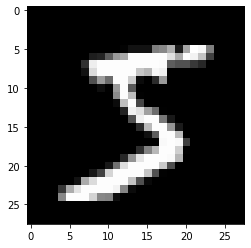

In [ ]:
imshow(x_train[0], cmap = 'gray')

In [ ]:
y_train[0]

5

In [ ]:
X = np.reshape(x_train, (60000,784))
Y = y_train

In [ ]:
print(X[0])
print(Y[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In this case we have n = 784, and we are having the vectors X[0], X[1] , ... , X[60000] each a vector of length 784 

Now we have to choose 100 images of each digit from this data set.

In [ ]:
# We can add the digits one by one, so first adding 100 '0' images then 100 '1' images and so on
x_new = []
y_new = []

In [ ]:
for digit in range(10):
  print("Doing it for the digit : " ,digit)
  num = 0
  for i in range(len(Y)):
    if Y[i] == digit:
      x_new.append(X[i])
      y_new.append(digit)
      num += 1
      if num >= 100:
        break

Doing it for the digit :  0
Doing it for the digit :  1
Doing it for the digit :  2
Doing it for the digit :  3
Doing it for the digit :  4
Doing it for the digit :  5
Doing it for the digit :  6
Doing it for the digit :  7
Doing it for the digit :  8
Doing it for the digit :  9


In [ ]:
print("Size of x_new is ", np.shape(x_new) , " and size of y_new is ", np.shape(y_new) )

Size of x_new is  (1000, 784)  and size of y_new is  (1000,)


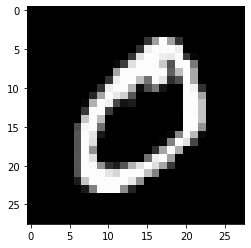

In [ ]:
imshow(np.reshape(x_new[0],(28,28)), cmap = 'gray')

Here we have n = 784 and N = 1000, since we have 100 images of each digit. 

In [ ]:
def euclidnorm(x,y):
    z = x - y
    dist = np.sqrt(np.sum(z**2))
    return dist

case (i) random initialization of cluster representatives;

In [ ]:
N = 1000
k = 20
siz_vec = 784

In [ ]:
# Randomly initialising 20 clusters
Z = np.random.randint(0,siz_vec,(k,siz_vec))

In [ ]:
# Initial random cluster assignment
cluster = np.random.randint(0,k, N)

In [ ]:
cluster

array([13, 13,  6, 16, 18,  9,  7, 15, 18, 10, 11, 10,  1, 19,  2,  8, 11,
       16,  7,  4, 15, 19,  6, 19, 11, 15,  9,  3,  1,  9, 14,  5, 12,  7,
        4, 17, 16, 10, 17, 13,  1, 11,  1,  7,  3, 14,  0, 19, 19, 12,  0,
        3, 17,  2, 15,  5,  9,  8, 13,  9,  4,  3,  0, 14,  2,  1, 18,  1,
        8,  8,  8,  3, 11, 13, 18, 16, 17, 17,  0,  8,  7,  4,  3,  5, 17,
       13,  3, 18, 18, 10,  3, 14, 11,  1, 19, 15,  4, 14, 18,  0,  8, 13,
        2,  4,  1, 17,  0,  1, 11,  8,  5, 17,  9,  5, 19, 15,  0,  2,  4,
       17,  7, 11,  0, 16, 18, 16,  7,  7, 17,  3,  7,  3, 12,  9, 13, 19,
        1, 13,  9,  5,  6,  1, 19,  5,  9,  6,  4, 13, 16, 14,  9, 16,  6,
       18, 13, 19, 11,  8,  5, 17,  0,  8, 17, 10,  0,  1,  6,  3,  2,  7,
        1,  0, 15, 10, 19,  1, 18,  8,  3, 14, 16, 10,  7, 10, 12,  8, 12,
        6,  3,  4,  1, 15, 14,  5,  8, 13, 17,  8, 13, 18,  9, 19,  8,  7,
       10, 19,  1, 11,  2,  7, 16,  7,  6,  4,  6,  4, 11, 12, 15,  4, 17,
       17, 17, 12,  2, 14

In [ ]:
def cal_Jclust(X, Z, c):
    N = len(c)
    jclust = 0
    for i in range(N):
        jclust += euclidnorm(X[i], Z[c[i]])
    jclust = (jclust/N)
    return jclust

In [ ]:
def iteration():
    print("cluster values are updated ")
    for i in range(N):
        min_val = 1e9
        idx = -1
        for j in range(k):
            dist = euclidnorm(x_new[i], Z[j])
            if dist < min_val :
                idx = j
                min_val = dist        
        cluster[i] = idx
    print("Z values are updated now")
    for j in range(k):
        avg_val = np.zeros(siz_vec)
        #print("The cluster " + str(j) + " has the following elements :")
        num = 0
        for i in range(N):
            if cluster[i] == j:
                #print(i)
                num += 1
                avg_val += x_new[i]
        if num == 0:
            Z[j] = avg_val
            continue
        avg_val = avg_val/num
        Z[j] = avg_val
    cluster_Val = cal_Jclust(x_new,Z,cluster)
    print("J_cluster Value is : " + str(cluster_Val))

(a) For k = 20, run the above algorithm to cluster the given images into 20
clusters. Plot the cluster representatives after the algorithm converges.
Count the number of iterations.

In [ ]:
prev_Cluster = cal_Jclust(x_new,Z,cluster)
it_no = 0
while(True):
  print("Iteration no: ",it_no)
  it_no += 1
  iteration()
  this_Cluster = cal_Jclust(x_new,Z,cluster)
  if abs(this_Cluster - prev_Cluster) < 0.01:
    break
  prev_Cluster = this_Cluster
print("Total iterations : ", it_no)

Iteration no:  0
cluster values are updated 
Z values are updated now
J_cluster Value is : 1782.2285625820948
Iteration no:  1
cluster values are updated 
Z values are updated now
J_cluster Value is : 1718.3946450675721
Iteration no:  2
cluster values are updated 
Z values are updated now
J_cluster Value is : 1692.7486614150182
Iteration no:  3
cluster values are updated 
Z values are updated now
J_cluster Value is : 1677.906353089511
Iteration no:  4
cluster values are updated 
Z values are updated now
J_cluster Value is : 1668.7617200862248
Iteration no:  5
cluster values are updated 
Z values are updated now
J_cluster Value is : 1657.7128375552236
Iteration no:  6
cluster values are updated 
Z values are updated now
J_cluster Value is : 1639.7732552524953
Iteration no:  7
cluster values are updated 
Z values are updated now
J_cluster Value is : 1627.0409240146655
Iteration no:  8
cluster values are updated 
Z values are updated now
J_cluster Value is : 1614.3549695463848
Iteration n

For i =  0


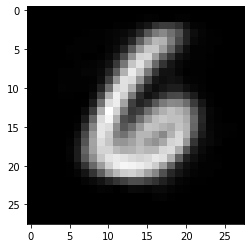

For i =  1


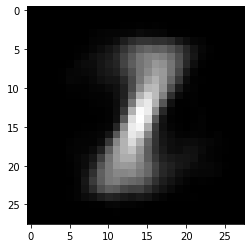

For i =  2


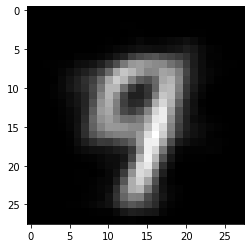

For i =  3


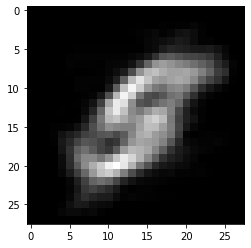

For i =  4


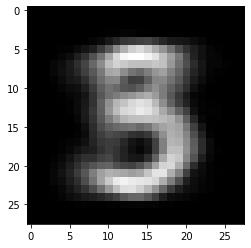

For i =  5


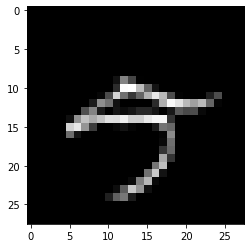

For i =  6


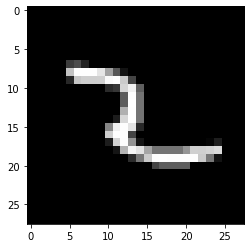

For i =  7


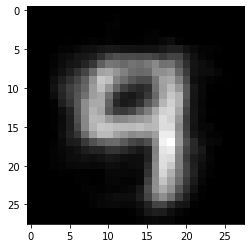

For i =  8


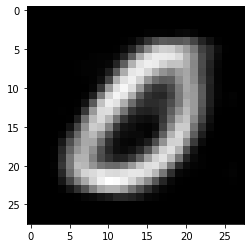

For i =  9


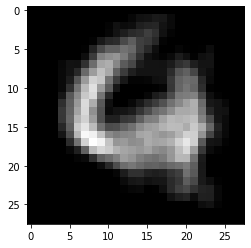

For i =  10


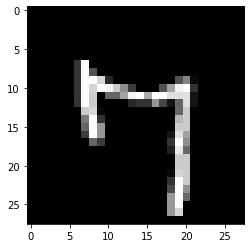

For i =  11


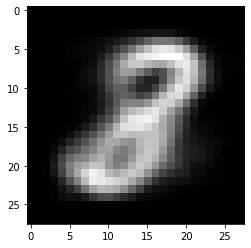

For i =  12


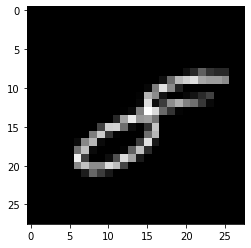

For i =  13


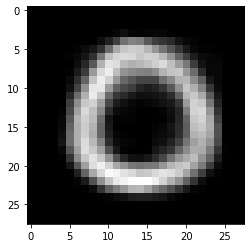

For i =  14


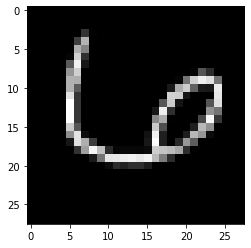

For i =  15


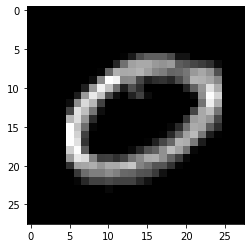

For i =  16


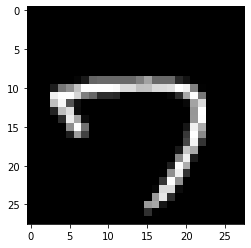

For i =  17


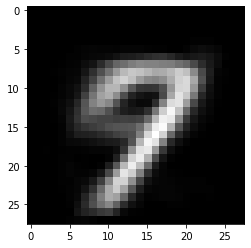

For i =  18


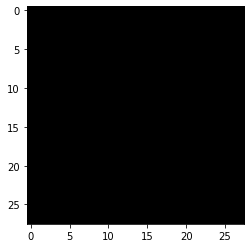

For i =  19


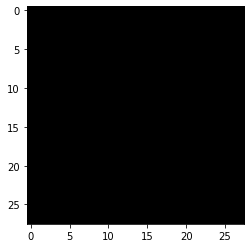

In [ ]:
for i in range(20):
  print("For i = ",i)
  imshow(np.reshape(Z[i],(28,28)), cmap = 'gray')
  show()

(b) Choose 50 images (not chosen previously) from the MNIST data set randomly and assign the clusters to these test images. What is the accuracy
of cluster assignment?

In [ ]:
# we can select 50 images from the test set
x_test = x_test[:50]

In [ ]:
np.shape(x_test)

(50, 28, 28)

In [ ]:
x_test = x_test.reshape(50, 784)

In [ ]:
#now we can assign the clusters to these test images
c_test = np.zeros(50)

In [ ]:
for i in range(50):
  min_Val = 1e9
  idx = -1
  for j in range(k):
    dist = euclidnorm(x_test[i], Z[j])
    if dist < min_Val :
      idx = j
      min_Val = dist
  c_test[i] = idx

In [ ]:
for i in range(50):
  print("It was put in the cluster : ",c_test[i]," and the number was ",y_test[i])

It was put in the cluster :  17.0  and the number was  7
It was put in the cluster :  4.0  and the number was  2
It was put in the cluster :  1.0  and the number was  1
It was put in the cluster :  8.0  and the number was  0
It was put in the cluster :  7.0  and the number was  4
It was put in the cluster :  1.0  and the number was  1
It was put in the cluster :  2.0  and the number was  4
It was put in the cluster :  7.0  and the number was  9
It was put in the cluster :  7.0  and the number was  5
It was put in the cluster :  17.0  and the number was  9
It was put in the cluster :  13.0  and the number was  0
It was put in the cluster :  9.0  and the number was  6
It was put in the cluster :  2.0  and the number was  9
It was put in the cluster :  13.0  and the number was  0
It was put in the cluster :  1.0  and the number was  1
It was put in the cluster :  4.0  and the number was  5
It was put in the cluster :  7.0  and the number was  9
It was put in the cluster :  2.0  and the nu

In [ ]:
num_cor = 0
for i in range(50):
  if y_test[i] == c_test[i]:
    num_cor += 1
accur = (num_cor/50)*100
print("The Accuracy is :",accur)

The Accuracy is : 16.0


(c) For k = 5 to k = 20, tabulate the values of J clust and discuss what may
be the optimal size of number of clusters.

In [ ]:
def iteration1():

    for i in range(N):
        min_val = 1e9
        idx = -1
        for j in range(k):
            dist = euclidnorm(x_new[i], Z[j])
            if dist < min_val :
                idx = j
                min_val = dist        
        cluster[i] = idx

    for j in range(k):
        avg_val = np.zeros(siz_vec)
        num = 0
        for i in range(N):
            if cluster[i] == j:
                num += 1
                avg_val += x_new[i]
        if num == 0:
            Z[j] = avg_val
            continue
        avg_val = avg_val/num
        Z[j] = avg_val

In [ ]:
J_clust = []
K_clust = []
for k in range(5,21):

  Z = np.random.randint(0,siz_vec,(k,siz_vec))
  cluster = np.random.randint(0,k, N)
  prev_Cluster = cal_Jclust(x_new,Z,cluster)
  it_no = 0
  while(True):
    it_no += 1
    iteration1()
    this_Cluster = cal_Jclust(x_new,Z,cluster)
    if abs(this_Cluster - prev_Cluster) < 0.01:
      break
    prev_Cluster = this_Cluster
  K_clust.append(k)
  print("For k = ", k)
  J_clust.append(prev_Cluster)
  print("Total iterations : ", it_no, " and the final value of J clust = ", prev_Cluster)

For k =  5
Total iterations :  26  and the final value of J clust =  1645.882547710923
For k =  6
Total iterations :  35  and the final value of J clust =  1632.0352488770668
For k =  7
Total iterations :  46  and the final value of J clust =  1595.8776679075897
For k =  8
Total iterations :  38  and the final value of J clust =  1583.1958090668777
For k =  9
Total iterations :  52  and the final value of J clust =  1567.6643371606865
For k =  10
Total iterations :  65  and the final value of J clust =  1539.2627911711625
For k =  11
Total iterations :  39  and the final value of J clust =  1558.7156125395925
For k =  12
Total iterations :  41  and the final value of J clust =  1515.888863381298
For k =  13
Total iterations :  44  and the final value of J clust =  1523.0011314434053
For k =  14
Total iterations :  56  and the final value of J clust =  1504.784534497168
For k =  15
Total iterations :  41  and the final value of J clust =  1512.0643354387366
For k =  16
Total iterations 

In [ ]:
import matplotlib.pyplot as plt

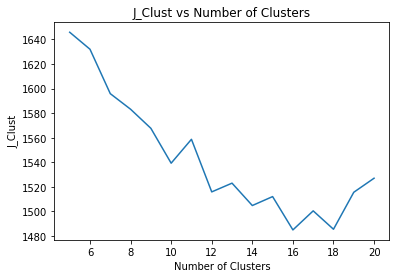

In [ ]:
plt.plot(K_clust,J_clust)
plt.title("J_Clust vs Number of Clusters")
plt.xlabel('Number of Clusters')
plt.ylabel('J_Clust')
plt.show()

Mathematically, we can say that the value of J_clust is minimum for k = 18. But actually it does not make much sense because the elements were initialized randomly. Let's see what the clusters look like

For i =  0


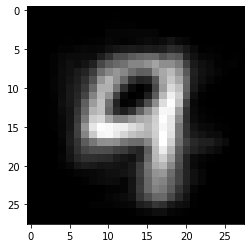

For i =  1


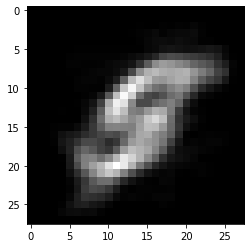

For i =  2


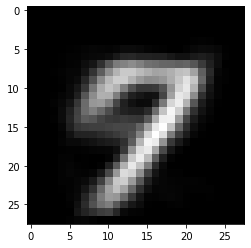

For i =  3


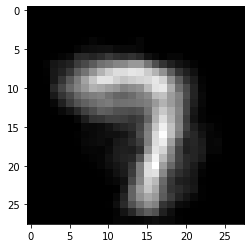

For i =  4


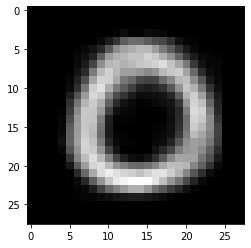

For i =  5


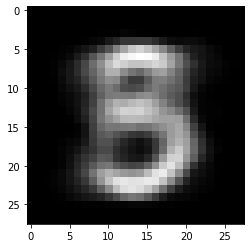

For i =  6


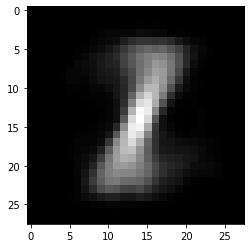

For i =  7


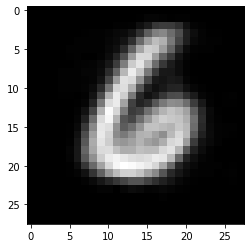

For i =  8


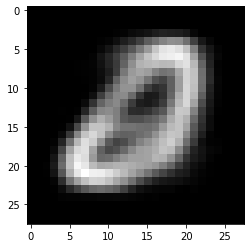

For i =  9


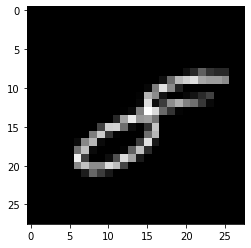

For i =  10


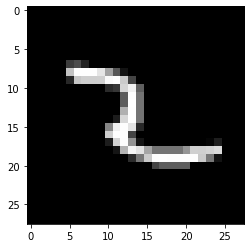

For i =  11


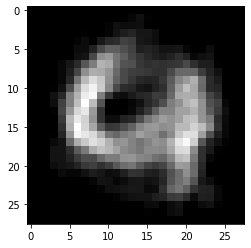

For i =  12


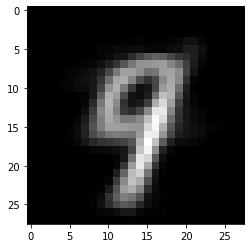

For i =  13


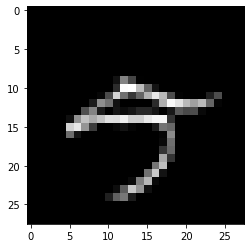

For i =  14


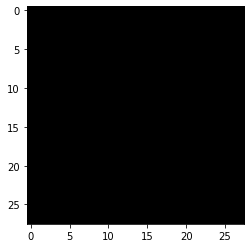

For i =  15


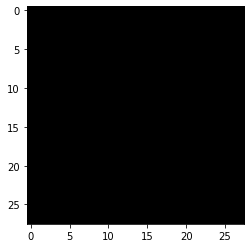

For i =  16


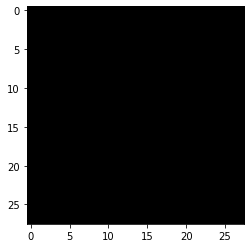

For i =  17


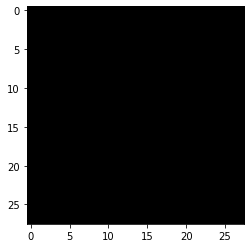

For i =  18


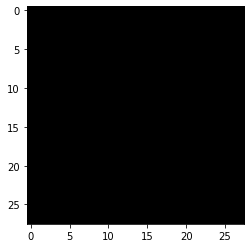

For i =  19


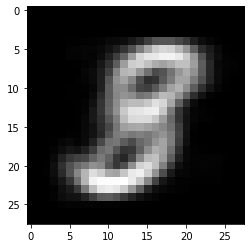

In [ ]:
for i in range(20):
  print("For i = ",i)
  imshow(np.reshape(Z[i],(28,28)), cmap = 'gray')
  show()

case(ii) choose cluster representatives from the given data set.

(a) For k = 20, run the above algorithm to cluster the given images into 20
clusters. Plot the cluster representatives after the algorithm converges.
Count the number of iterations.

In [ ]:
k = 20
cluster = np.random.randint(0,k, N)

In [ ]:
Z = []
dicty ={}
for i in range(10):
  print("Cluster ",i," has the value ",y_new[100*i])
  dicty[i] = y_new[100*i]
  Z.append(x_new[100*i])
for i in range(10,20):
  print("Cluster ",i," has the value ",y_new[100*(i-10)+ 2])
  dicty[i] = y_new[100*(i-10)+ 2]
  Z.append(x_new[100*(i-10)+ 2])

Cluster  0  has the value  0
Cluster  1  has the value  1
Cluster  2  has the value  2
Cluster  3  has the value  3
Cluster  4  has the value  4
Cluster  5  has the value  5
Cluster  6  has the value  6
Cluster  7  has the value  7
Cluster  8  has the value  8
Cluster  9  has the value  9
Cluster  10  has the value  0
Cluster  11  has the value  1
Cluster  12  has the value  2
Cluster  13  has the value  3
Cluster  14  has the value  4
Cluster  15  has the value  5
Cluster  16  has the value  6
Cluster  17  has the value  7
Cluster  18  has the value  8
Cluster  19  has the value  9


For i =  0


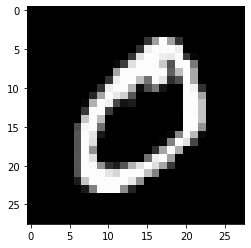

For i =  1


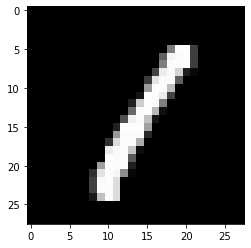

For i =  2


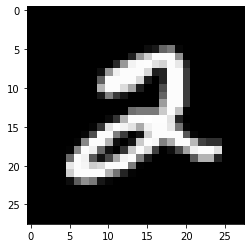

For i =  3


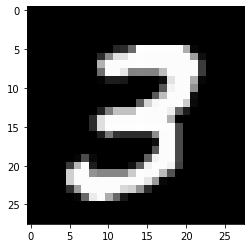

For i =  4


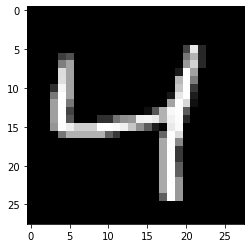

For i =  5


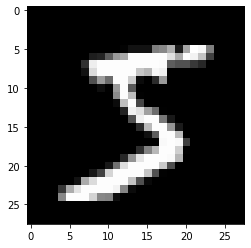

For i =  6


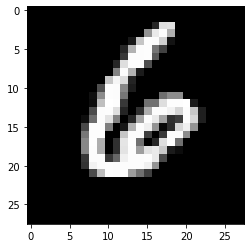

For i =  7


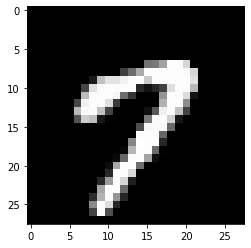

For i =  8


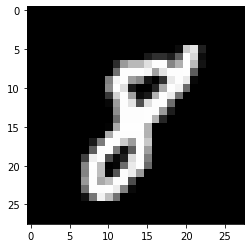

For i =  9


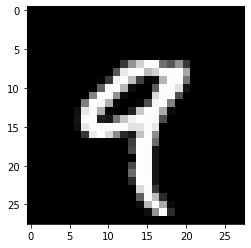

For i =  10


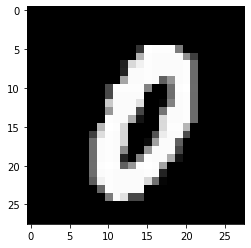

For i =  11


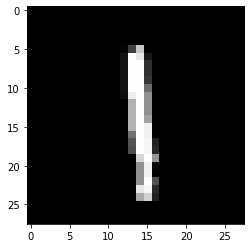

For i =  12


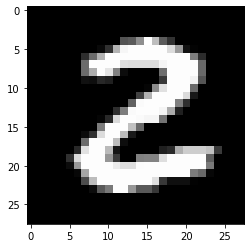

For i =  13


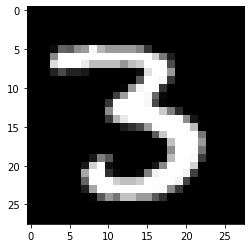

For i =  14


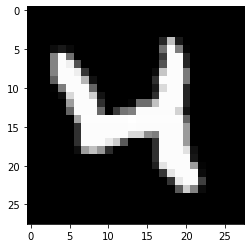

For i =  15


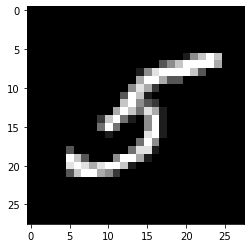

For i =  16


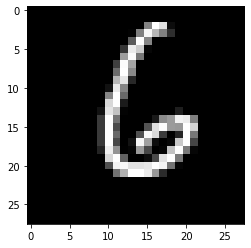

For i =  17


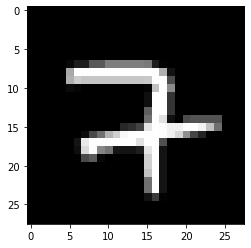

For i =  18


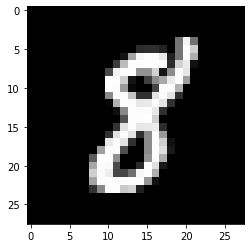

For i =  19


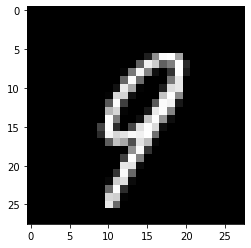

In [ ]:
for i in range(20):
  print("For i = ",i)
  imshow(np.reshape(Z[i],(28,28)), cmap = 'gray')
  show()

In [ ]:
prev_Cluster = cal_Jclust(x_new,Z,cluster)
print("Initial J Clust = ", prev_Cluster)
it_no = 0
while(True):
  print("Iteration no: ",it_no)
  it_no += 1
  iteration()
  this_Cluster = cal_Jclust(x_new,Z,cluster)
  if abs(this_Cluster - prev_Cluster) < 0.000001:
    break
  prev_Cluster = this_Cluster
print("Total iterations : ", it_no)

Initial J Clust =  133.97005000075174
Iteration no:  0
cluster values are updated 
Z values are updated now
J_cluster Value is : 1763.7066254501908
Iteration no:  1
cluster values are updated 
Z values are updated now
J_cluster Value is : 1563.9153630016895
Iteration no:  2
cluster values are updated 
Z values are updated now
J_cluster Value is : 1506.0452746029096
Iteration no:  3
cluster values are updated 
Z values are updated now
J_cluster Value is : 1471.9836007966287
Iteration no:  4
cluster values are updated 
Z values are updated now
J_cluster Value is : 1458.493041512846
Iteration no:  5
cluster values are updated 
Z values are updated now
J_cluster Value is : 1452.7113572983938
Iteration no:  6
cluster values are updated 
Z values are updated now
J_cluster Value is : 1447.308716892262
Iteration no:  7
cluster values are updated 
Z values are updated now
J_cluster Value is : 1444.9858987717141
Iteration no:  8
cluster values are updated 
Z values are updated now
J_cluster Valu

For i =  0


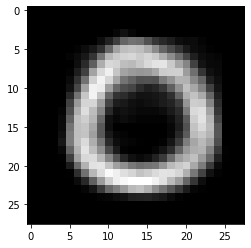

For i =  1


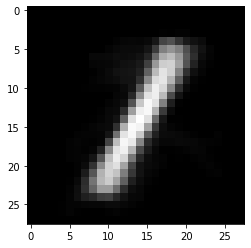

For i =  2


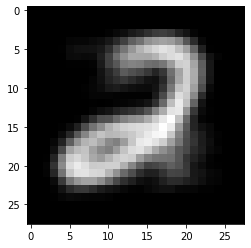

For i =  3


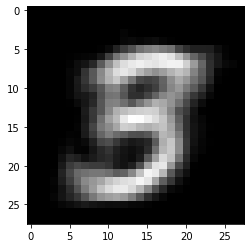

For i =  4


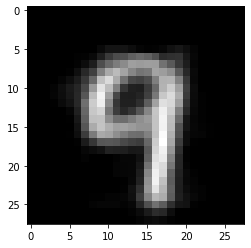

For i =  5


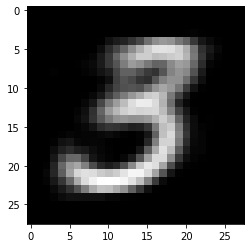

For i =  6


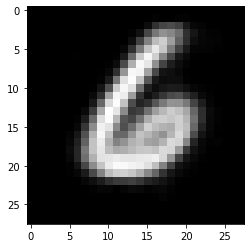

For i =  7


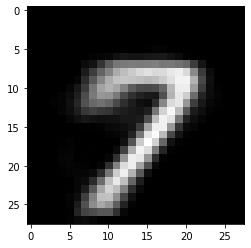

For i =  8


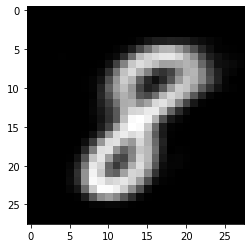

For i =  9


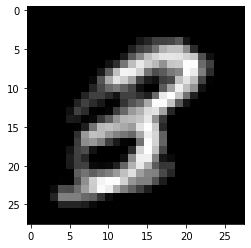

For i =  10


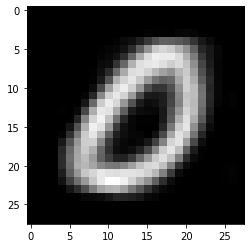

For i =  11


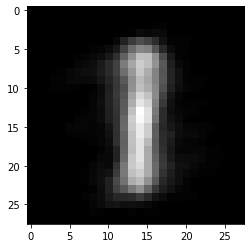

For i =  12


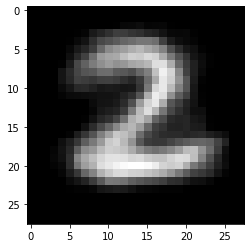

For i =  13


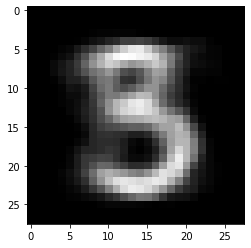

For i =  14


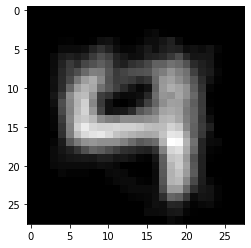

For i =  15


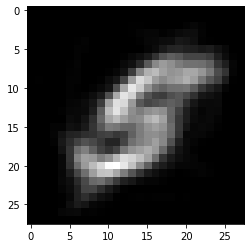

For i =  16


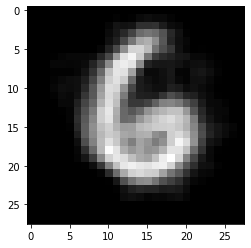

For i =  17


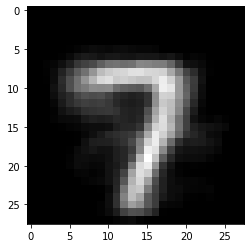

For i =  18


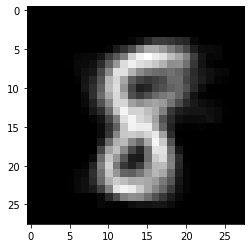

For i =  19


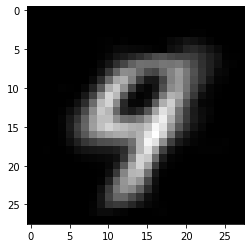

In [ ]:
for i in range(20):
  print("For i = ",i)
  imshow(np.reshape(Z[i],(28,28)), cmap = 'gray')
  show()

(b) Choose 50 images (not chosen previously) from the MNIST data set ran-
domly and assign the clusters to these test images. What is the accuracy
of cluster assignment?

In [ ]:
for i in range(50):
  min_Val = 1e9
  idx = -1
  for j in range(k):
    dist = euclidnorm(x_test[i], Z[j])
    if dist < min_Val :
      idx = j
      min_Val = dist
  cluster[i] = idx

In [ ]:
num_cor = 0
for i in range(50):
  print("It was put in the cluster : ",cluster[i]," and the actual number was ",y_test[i], " predicted : ", dicty[cluster[i]])
  if y_test[i] == dicty[cluster[i]]:
    num_cor += 1
accur = (num_cor/50)*100
print("The Accuracy is :",accur)

It was put in the cluster :  17  and the actual number was  7  predicted :  7
It was put in the cluster :  12  and the actual number was  2  predicted :  2
It was put in the cluster :  11  and the actual number was  1  predicted :  1
It was put in the cluster :  10  and the actual number was  0  predicted :  0
It was put in the cluster :  4  and the actual number was  4  predicted :  4
It was put in the cluster :  1  and the actual number was  1  predicted :  1
It was put in the cluster :  17  and the actual number was  4  predicted :  7
It was put in the cluster :  4  and the actual number was  9  predicted :  4
It was put in the cluster :  16  and the actual number was  5  predicted :  6
It was put in the cluster :  7  and the actual number was  9  predicted :  7
It was put in the cluster :  0  and the actual number was  0  predicted :  0
It was put in the cluster :  12  and the actual number was  6  predicted :  2
It was put in the cluster :  19  and the actual number was  9  predic

(c) For k = 5 to k = 20, tabulate the values of J clust and discuss what may
be the optimal size of number of clusters.

In [ ]:
def initialize_Z(k):
  Z = []
  dicty ={}
  for i in range(10):
    if i >= k:
      break
    print("Cluster ",i," has the value ",y_new[100*i])
    dicty[i] = y_new[100*i]
    Z.append(x_new[100*i])
  if k <= 10:
    return dicty
  for i in range(10,k):
    print("Cluster ",i," has the value ",y_new[100*(i-10)+ 2])
    dicty[i] = y_new[100*(i-10)+ 2]
    Z.append(x_new[100*(i-10)+ 2])
  return dicty

In [ ]:
J_clust = []
K_clust = []
for k in range(5,21):
  dicty = initialize_Z(k)
  cluster = np.random.randint(0,k, N)
  prev_Cluster = cal_Jclust(x_new,Z,cluster)
  it_no = 0
  while(True):
    #print("Iteration no: ",it_no)
    it_no += 1
    iteration1()
    this_Cluster = cal_Jclust(x_new,Z,cluster)
    if abs(this_Cluster - prev_Cluster) < 0.01:
      break
    prev_Cluster = this_Cluster
  K_clust.append(k)
  print("For k = ", k)
  J_clust.append(prev_Cluster)
  print("Total iterations : ", it_no, " and the final value of J clust = ", prev_Cluster)

Cluster  0  has the value  0
Cluster  1  has the value  1
Cluster  2  has the value  2
Cluster  3  has the value  3
Cluster  4  has the value  4
For k =  5
Total iterations :  13  and the final value of J clust =  1638.5446886447912
Cluster  0  has the value  0
Cluster  1  has the value  1
Cluster  2  has the value  2
Cluster  3  has the value  3
Cluster  4  has the value  4
Cluster  5  has the value  5
For k =  6
Total iterations :  20  and the final value of J clust =  1615.5165791137722
Cluster  0  has the value  0
Cluster  1  has the value  1
Cluster  2  has the value  2
Cluster  3  has the value  3
Cluster  4  has the value  4
Cluster  5  has the value  5
Cluster  6  has the value  6
For k =  7
Total iterations :  5  and the final value of J clust =  1594.002988699041
Cluster  0  has the value  0
Cluster  1  has the value  1
Cluster  2  has the value  2
Cluster  3  has the value  3
Cluster  4  has the value  4
Cluster  5  has the value  5
Cluster  6  has the value  6
Cluster  7  h

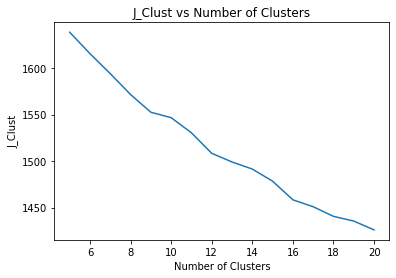

In [ ]:
plt.plot(K_clust,J_clust)
plt.title("J_Clust vs Number of Clusters")
plt.xlabel('Number of Clusters')
plt.ylabel('J_Clust')
plt.show()

Here we see that the minimum value is assumed at k = 20. Which is evident becuase it lets the different classes to be distributed properly

In [ ]:
tot = 0
for i in range(N):
  if dicty[cluster[i]] == y_new[i]:
    tot += 1
acc_per = (100*tot)/N
print("Accuracy shown is ", acc_per," %")

Accuracy shown is  62.6  %


Does the choice of initial condition have any effect on the performance of
k-means clustering algorithm?

Ans : Yes, it does affect the performance of the k-means clustering algorithm